In [1]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np
import os
import pandas as pd

from scipy.optimize import curve_fit

In [2]:
# This assumes the script is run in the `PlateReader` folder of the data repo
ds_droplets_mg = pd.read_csv('Kinetics/Droplets_MG+MGA_annotated.csv')
ds_droplets_dfhbi = pd.read_csv('Kinetics/Droplets_DFHBI+BrA_annotated.csv')

ds_c_mg = pd.read_csv('Kinetics/C_Ternary_Bulk_and_Droplets_MG+MGA_annotated.csv')
ds_c_dfhbi = pd.read_csv('Kinetics/C_Ternary_Bulk_and_Droplets_DFHBI+BrA_annotated.csv')

In [3]:
samples_droplets = {
    'Sample X1': 'Water', 
    'Sample X2' : 'IVTM', 
    'Sample X3' : 'A_bar',
    'Sample X4' : 'A', 
    'Sample X5' : 'B_bar', 
    'Sample X6' : 'B', 
    'Sample X7' : 'B 1/2',
    'Sample X8' : 'B 1/4', 
    'Sample X9' : 'A_bar+B_bar', 
    'Sample X10' : 'A+B_bar',
    'Sample X11' : 'A_bar+B', 
    'Sample X12' : 'A+B 1:1',
    'Sample X13' : 'A+B 1:2', 
    'Sample X14' : 'A+B 1:4', 
    'Sample X15' : 'A+B 2:1', 
    'Sample X16' : 'A+B 4:1'
}

samples_droplets_c = {
    'Sample X3' : 'C', 
    'Sample X4' : 'A+B+C', 
}

In [4]:
# Extracting Time arrays and converting from s to h
time_droplets = np.array(ds_droplets_dfhbi['Time [s]'])/3600
time_c = np.array(ds_c_dfhbi['Time [s]'])/3600

In [5]:
def get_mean_std_from_dataset(dataset, sample_list, normalised = False): 
    
    def normalise(vec):
        return (vec - np.min(vec))/(np.max(vec) - np.min(vec))
    
    #def normalise_controls(vec): 
    #    return (vec - np.mean(vec))/np.mean(vec)
    
    #if normalisation == True and control_list == None: 
    #    print('Need to provide control samples if using normalisation!')
    #    return None
    
    mean_dict = {}
    std_dict = {}
    
    for sample in sample_list: 
        #print(sample)
        mean_dict[sample_list[sample]] = []
        std_dict[sample_list[sample]] = []
        temp = []
        for rep in range(3): 
            if rep != 0: 
                sample_name = sample+'.'+str(rep)
            else: 
                sample_name = sample
            if normalised == False: 
                temp.append(np.array(dataset[sample_name]))
            #elif (normalised == True) and (sample_list[sample] in control_list): 
            #    print('Control sample normalisation triggered')
            #    temp.append(normalise_controls(np.array(dataset[sample_name])))
            elif (normalised == True): 
                temp.append(normalise(np.array(dataset[sample_name])))
            

        temp_mean = np.mean(temp, axis = 0)
        temp_std = np.std(temp, axis = 0, ddof = 1)
        mean_dict[sample_list[sample]] = temp_mean
        std_dict[sample_list[sample]] = temp_std

    return mean_dict, std_dict

In [6]:
# First get non-normalised profiles
normalisation = False

# All other samples
mg_channel_droplets_mean, mg_channel_droplets_std = get_mean_std_from_dataset(ds_droplets_mg, samples_droplets, normalised = normalisation)
dfhbi_channel_droplets_mean, dfhbi_channel_droplets_std = get_mean_std_from_dataset(ds_droplets_dfhbi, samples_droplets, normalised = normalisation)

# C and ternary
mg_channel_droplets_c_mean, mg_channel_droplets_c_std = get_mean_std_from_dataset(ds_c_mg, samples_droplets_c, normalised = normalisation)
dfhbi_channel_droplets_c_mean, dfhbi_channel_droplets_c_std = get_mean_std_from_dataset(ds_c_dfhbi, samples_droplets_c, normalised = normalisation)

# Combine results
mg_channel_droplets_mean = {**mg_channel_droplets_mean, **mg_channel_droplets_c_mean}
mg_channel_droplets_std = {**mg_channel_droplets_std, **mg_channel_droplets_c_std}
dfhbi_channel_droplets_mean = {**dfhbi_channel_droplets_mean, **dfhbi_channel_droplets_c_mean}
dfhbi_channel_droplets_std = {**dfhbi_channel_droplets_std, **dfhbi_channel_droplets_c_std}

In [7]:
def process(dictionary, sample_list=None, reference=None): 
    maxes = {}
    maxes_list = []
    if sample_list is None: 
        sample_list = dictionary.keys()
        
    
    maxes = {
        sample: np.max(dictionary[sample])
        for sample in sample_list
    }
    maxes_list = [np.max(dictionary[sample]) for sample in sample_list]
    
    if reference is None: 
        reference = np.max(maxes_list)
        
    maxes_ratios = {
        sample: maxes[sample]/reference
        for sample in sample_list
    }
    
    return maxes_ratios

In [8]:
# Get ratios between max intensities to plot normalised profiles while maintaining magnitude scaling
maxes_mg_ratios = process(mg_channel_droplets_mean)
maxes_dfhbi_ratios = process(dfhbi_channel_droplets_mean)

# C is plotted alone - normalise by itself
maxes_mg_c_ratios = process(mg_channel_droplets_mean, sample_list=['Water', 'IVTM', 'C'])
maxes_dfhbi_c_ratios = process(dfhbi_channel_droplets_mean, sample_list=['Water', 'IVTM', 'C'])

In [9]:
# Now get normalised profiles for plotting
normalisation = True

# All samples
mg_channel_droplets_mean_norm, mg_channel_droplets_std_norm = get_mean_std_from_dataset(ds_droplets_mg, samples_droplets, normalised = normalisation)
dfhbi_channel_droplets_mean_norm, dfhbi_channel_droplets_std_norm = get_mean_std_from_dataset(ds_droplets_dfhbi, samples_droplets, normalised = normalisation)

# C and Ternary
mg_channel_droplets_c_mean_norm, mg_channel_droplets_c_std_norm = get_mean_std_from_dataset(ds_c_mg, samples_droplets_c, normalised = normalisation)
dfhbi_channel_droplets_c_mean_norm, dfhbi_channel_droplets_c_std_norm = get_mean_std_from_dataset(ds_c_dfhbi, samples_droplets_c, normalised = normalisation)

In [10]:
# Recombine
mg_channel_droplets_mean_norm = {**mg_channel_droplets_mean_norm, **mg_channel_droplets_c_mean_norm}
mg_channel_droplets_std_norm = {**mg_channel_droplets_std_norm, **mg_channel_droplets_c_std_norm}
dfhbi_channel_droplets_mean_norm = {**dfhbi_channel_droplets_mean_norm, **dfhbi_channel_droplets_c_mean_norm}
dfhbi_channel_droplets_std_norm = {**dfhbi_channel_droplets_std_norm, **dfhbi_channel_droplets_c_std_norm}

In [11]:
colours = {
    'Water' : 'cornflowerblue', 
    'IVTM' : 'tan', 
    'B_bar' : 'darkcyan', 
    'B' : 'cyan', 
    'B 1/2' : 'darkturquoise', 
    'B 1/4' : 'paleturquoise', 
    'A_bar' : 'firebrick', 
    'A' : 'orangered', 
    'A_bar+B_bar' : 'indigo', 
    'A+B_bar' : 'darkviolet', 
    'A_bar+B' : 'thistle', 
    'A+B 1:1' : 'orchid', 
    'A+B 1:2' : 'mediumorchid', 
    'A+B 1:4' : 'slateblue',
    'A+B 2:1' : 'hotpink', 
    'A+B 4:1' : 'crimson', 
    'C' : 'gray', 
    'A+B+C' : 'lightgray'
}

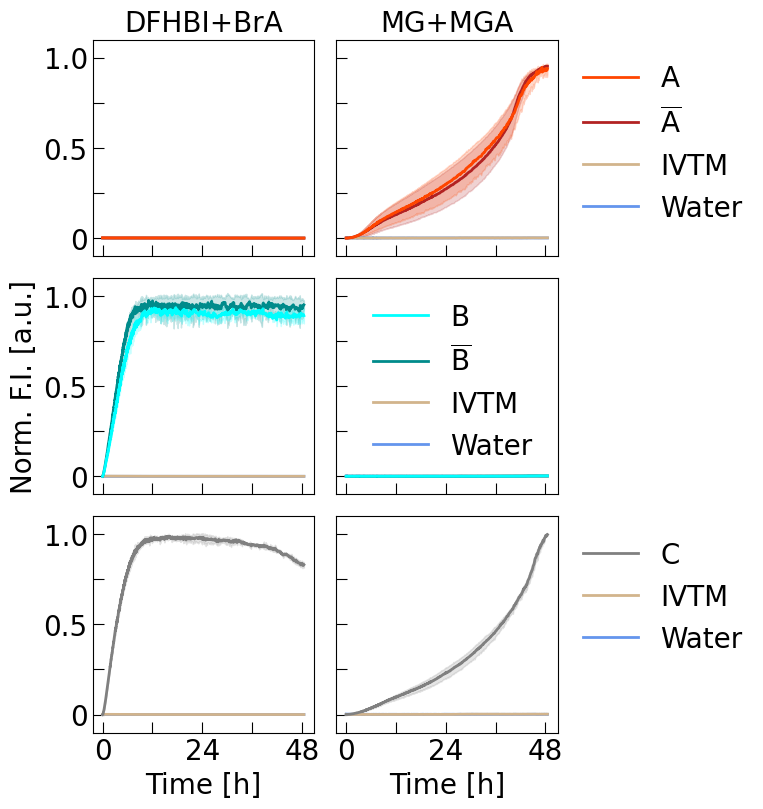

In [12]:
# Figure S31

labels = {'Water': 'Water', 'IVTM' : 'IVTM', 
          'A_bar' : r'$\overline{A}$', 'A' : 'A', 
          'B_bar' : r'$\overline{B}$', 'B' : 'B',
          'C' : 'C'}
          
plt.rcParams['mathtext.default'] = 'regular'
plt.subplots(3, 2, figsize = (6, 9), sharey = False, sharex = True)
plt.subplots_adjust(wspace = 0.10, hspace = 0.10)
plt.subplot(321)

for sample in ['Water', 'IVTM', 'A_bar', 'A']: 
    plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] - dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], 
                     dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] + dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], alpha = 0.2, color = colours[sample])

ax1 = plt.gca()
ax1.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax1.set_yticklabels([0, '', 0.5, '', 1.00], fontsize = 20)
ax1.tick_params(direction = 'in', length = 8)
ax1.set_ylim([-0.1, 1.1])
ax1.set_title('DFHBI+BrA', fontsize = 20)
#ax1.legend(frameon = False, fontsize = 20, bbox_to_anchor = [1.0, 1.0])

plt.subplot(322)
ax2 = plt.gca()
for sample in ['Water', 'IVTM', 'A_bar', 'A']: 
    ax2.plot(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    ax2.fill_between(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_ratios[sample] - mg_channel_droplets_std_norm[sample]*maxes_mg_ratios[sample], 
                     mg_channel_droplets_mean_norm[sample]*maxes_mg_ratios[sample] + mg_channel_droplets_std_norm[sample]*maxes_mg_ratios[sample], alpha = 0.2, color = colours[sample])
    
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax2.set_yticklabels([], fontsize = 20)
ax2.tick_params(direction = 'in', length = 8)
ax2.set_ylim([-0.1, 1.1])
ax2.set_title('MG+MGA', fontsize = 20)
handles, labels2 = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels2), frameon = False, fontsize = 20, bbox_to_anchor = [1.00, 1.00])




plt.subplot(323)

for sample in ['Water', 'IVTM', 'B_bar', 'B']: 
    plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] - dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], 
                     dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] + dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], alpha = 0.2, color = colours[sample])

ax3 = plt.gca()
ax3.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax3.set_yticklabels([0, '', 0.5, '', 1.00], fontsize = 20)
ax3.tick_params(direction = 'in', length = 8)
ax3.set_ylim([-0.1, 1.1])
ax3.set_ylabel('Norm. F.I. [a.u.]', fontsize = 20)
#ax3.legend(frameon = False, fontsize = 20, bbox_to_anchor = [0.1, 1.0])


plt.subplot(324)
ax4 = plt.gca()
for sample in ['Water', 'IVTM', 'B_bar', 'B']: 
    ax4.plot(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    ax4.fill_between(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_ratios[sample] - mg_channel_droplets_std_norm[sample]*maxes_mg_ratios[sample], 
                     mg_channel_droplets_mean_norm[sample]*maxes_mg_ratios[sample] + mg_channel_droplets_std_norm[sample]*maxes_mg_ratios[sample], alpha = 0.2, color = colours[sample])
    

ax4.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax4.set_yticklabels([], fontsize = 20)
ax4.tick_params(direction = 'in', length = 8)
ax4.set_ylim([-0.1, 1.1])
handles, labels2 = ax4.get_legend_handles_labels()
ax4.legend(reversed(handles), reversed(labels2), frameon = False, fontsize = 20, bbox_to_anchor = [1.00, 1.00])



plt.subplot(325)

for sample in ['Water', 'IVTM', 'C']: 
    plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_c_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_c_ratios[sample] - dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_c_ratios[sample], 
                     dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_c_ratios[sample] + dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_c_ratios[sample], alpha = 0.2, color = colours[sample])

ax5 = plt.gca()
ax5.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax5.set_yticklabels([0, '', 0.5, '', 1.00], fontsize = 20)
ax5.tick_params(direction = 'in', length = 8)
ax5.set_ylim([-0.1, 1.1])
ax5.set_xticks([0, 12, 24, 36, 48], labels = [0, '', 24, '', 48], fontsize = 20)
ax5.set_xlabel('Time [h]', fontsize = 20)
#ax5.legend(frameon = False, fontsize = 20, bbox_to_anchor = [0.1, 1.0])

plt.subplot(326)
ax6 = plt.gca()
for sample in ['Water', 'IVTM', 'C']: 
    ax6.plot(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_c_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    ax6.fill_between(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_c_ratios[sample] - mg_channel_droplets_std_norm[sample]*maxes_mg_c_ratios[sample], 
                     mg_channel_droplets_mean_norm[sample]*maxes_mg_c_ratios[sample] + mg_channel_droplets_std_norm[sample]*maxes_mg_c_ratios[sample], alpha = 0.2, color = colours[sample])

ax6.set_yticks([0, 0.25, 0.5, 0.75, 1.00])
ax6.set_yticklabels([], fontsize = 20)
ax6.tick_params(direction = 'in', length = 8)
ax6.set_ylim([-0.1, 1.1])
ax6.set_xticks([0, 12, 24, 36, 48], labels = [0, '', 24, '', 48], fontsize = 20)
ax6.set_xlabel('Time [h]', fontsize = 20);
handles, labels2 = ax6.get_legend_handles_labels()
ax6.legend(reversed(handles), reversed(labels2), frameon = False, fontsize = 20, bbox_to_anchor = [1.00, 1.00])
plt.show()

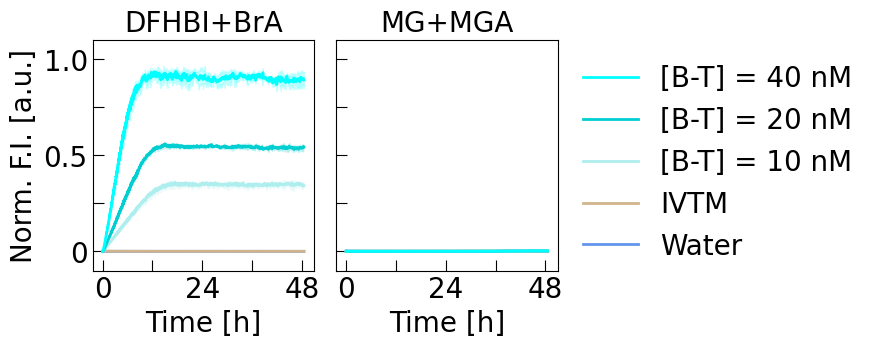

In [13]:
# Figure S32
labels = {'Water': 'Water', 'IVTM' : 'IVTM', 
          'B 1/4' : r'[B-T] = 10 nM', 'B 1/2' : r'[B-T] = 20 nM', 'B' : r'[B-T] = 40 nM'}

plt.subplots(1, 2, figsize = (6, 3))
plt.subplots_adjust(wspace = 0.10)
plt.subplot(121)
for sample in ['Water', 'IVTM', 'B 1/4', 'B 1/2', 'B']:
    plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] - dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], 
                     dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] + dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], alpha = 0.2, color = colours[sample])

ax = plt.gca()
ax.set_ylabel('Norm. F.I. [a.u.]', fontsize = 20)
ax.tick_params(direction = 'in', length = 8)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.00], labels = [0, '', 0.5, '', 1.00], fontsize = 20)
ax.set_yticklabels([0, '', 0.5, '', 1.00], fontsize = 20)
ax.set_ylim([-0.1, 1.1])
ax.set_xticks([0, 12, 24, 36, 48])
ax.set_xticklabels([0, '', 24, '', 48], fontsize = 20)
ax.set_xlabel('Time [h]', fontsize = 20)
ax.set_title('DFHBI+BrA', fontsize = 20)

plt.subplot(122)
ax2 = plt.gca()
for sample in ['Water', 'IVTM', 'B 1/4', 'B 1/2', 'B']:
    ax2.plot(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    ax2.fill_between(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_ratios[sample] - mg_channel_droplets_std_norm[sample]*maxes_mg_ratios[sample], 
                     mg_channel_droplets_mean_norm[sample]*maxes_mg_ratios[sample] + mg_channel_droplets_std_norm[sample]*maxes_mg_ratios[sample], alpha = 0.2, color = colours[sample])


#ax2.set_ylabel('MG F.I. [a.u.]', fontsize = 20, color = 'firedfhbiick')
ax2.tick_params(direction = 'in', length = 8)
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1.00], labels = [], fontsize = 20)
ax2.set_yticklabels([], fontsize = 20)
ax2.set_ylim([-0.1, 1.1])
ax2.set_title('MG+MGA', fontsize = 20)
ax2.set_xticks([0, 12, 24, 36, 48])
ax2.set_xticklabels([0, '', 24, '', 48], fontsize = 20)
ax2.set_xlabel('Time [h]', fontsize = 20)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels), frameon = False, fontsize = 20, bbox_to_anchor = [1.00, 1.00])
plt.show()

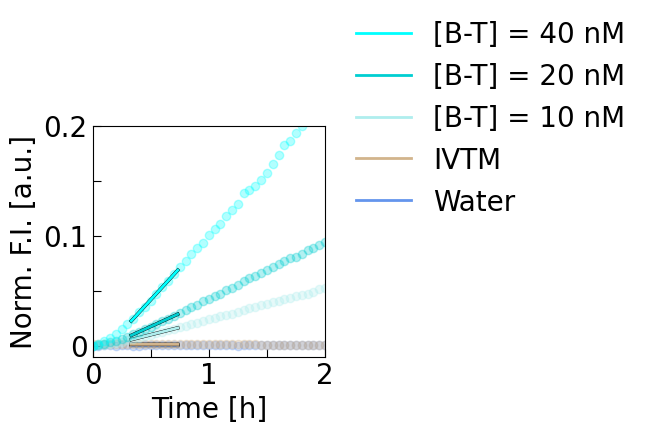

In [14]:
# Figure S33(i)
def line(x, m, c):
    return m*x + c


start = 20
num_points = 30
slopes = {}
intercepts = {}
results = {}
    
plt.figure(figsize = (3, 3))
#plt.fill_betweenx([0, 0.2], time_droplets[9], time_droplets[10], color = 'darkorange', alpha = 0.1)
for sample in ['Water', 'IVTM', 'B 1/4', 'B 1/2', 'B']: 
    x = time_droplets[start:15+num_points]
    y = dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample]
    y = y[start:15+num_points]
    sigma_y = dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample]
    sigma_y = sigma_y[start:15+num_points]
    params, pcov = curve_fit(line, x, y, sigma = sigma_y)
    slopes[sample] = [params[0], np.sqrt(pcov[0, 0])]
    intercepts[sample] = params[1]
    line_fit = params[0]*x + params[1]
    results[sample+"- Time [s]"] = (x*3600).astype(int)
    results[sample+f"- Linear Fit [a.u.], slope: {params[0]}, std_slope: {np.sqrt(pcov[0, 0])}, intercept: {params[1]}"] = line_fit

    
    plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample], ls = '', marker = 'o', ms = 6, markevery = 3, alpha = 0.3, label = 'Mean Normalised Profile', color = colours[sample])
    plt.plot(x, line_fit, lw = 2.0, color = colours[sample], label = 'Linear Fit', path_effects=[pe.Stroke(linewidth=2.5, foreground='k'), pe.Normal()])
plt.xlim([0, 1])
plt.ylim([-0.01, 0.2])
plt.xlabel('Time [h]', fontsize = 20)
plt.xticks([0, 0.5, 1, 1.5, 2], [0, '', 1, '', 2], fontsize = 20)
plt.ylabel('Norm. F.I. [a.u.]', fontsize = 20)
plt.yticks([0, 0.05, 0.1, 0.15, 0.2], [0, '', 0.1, '', 0.2], fontsize = 20)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 6)
plt.legend(reversed(handles), reversed(labels), frameon = False, fontsize = 20, bbox_to_anchor = [2.4, 0.5])
plt.show()

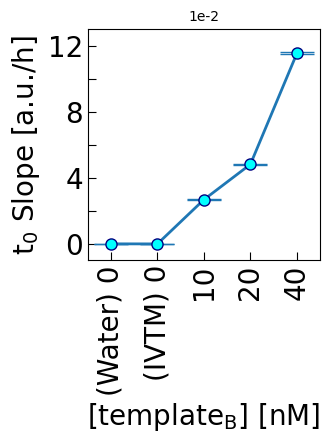

In [15]:
# Figure S33(ii)
plt.figure(figsize = (3, 3 ))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.errorbar([0, 1, 2, 3, 4], np.array(list(slopes.values()))[:, 0], np.array(list(slopes.values()))[:, 1],
             lw = 2.0, marker = 'o', mec = 'navy', mfc = 'cyan', ms = 8, 
            capsize = 12)
plt.xlabel(r'[template$_B$] [nM]', fontsize = 20)
plt.ylabel(r't$_0$ Slope [a.u./h]', fontsize = 20)
plt.xlim([-.5, 4.5])
plt.ylim([-0.01, 0.13])
plt.xticks([0, 1, 2, 3, 4], ['(Water) 0', '(IVTM) 0', '10', '20', '40'], fontsize = 20, rotation = 90)
plt.yticks([0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12], [0, '', 4, '', 8, '', 12], fontsize = 20)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 6)
plt.title('1e-2', fontsize = 10)
plt.show()

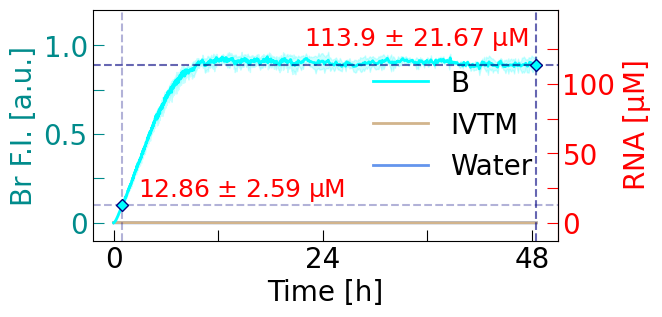

In [16]:
# Figure S34 (with controls)
labels = {'Water': 'Water', 'IVTM' : 'IVTM', 'B' : 'B'}

plt.figure(figsize = (6, 3))
for sample in ['Water', 'IVTM', 'B']: 
    plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] - dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], 
                     dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] + dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], alpha = 0.2, color = colours[sample])

timepoint = (60)/60 #1h

max_br = dfhbi_channel_droplets_mean_norm['B'][-1]*maxes_dfhbi_ratios['B']
max_br_std = dfhbi_channel_droplets_std_norm['B'][-1]*maxes_dfhbi_ratios['B']

plt.axhline(dfhbi_channel_droplets_mean_norm['B'][np.argmin(np.abs(time_droplets - timepoint))]*maxes_dfhbi_ratios['B'], ls = '--', color = 'navy', alpha = 0.3)
plt.axvline(time_droplets[np.argmin(np.abs(time_droplets - timepoint))], ls = '--', color = 'navy', alpha = 0.3)
plt.plot(time_droplets[np.argmin(np.abs(time_droplets - timepoint))], dfhbi_channel_droplets_mean_norm['B'][np.argmin(np.abs(time_droplets - timepoint))]*maxes_dfhbi_ratios['B'], marker = 'D', ms = 6, mec = 'navy', color = 'cyan')

plt.axhline(dfhbi_channel_droplets_mean_norm['B'][-1]*maxes_dfhbi_ratios['B'], ls = '--', color = 'navy', alpha = 0.6)
plt.axvline(time_droplets[-1], ls = '--', color = 'navy', alpha = 0.6)
plt.plot(time_droplets[-1], dfhbi_channel_droplets_mean_norm['B'][-1]*maxes_dfhbi_ratios['B'], marker = 'D', ms = 6, mec = 'navy', color = 'cyan')


ax = plt.gca()
ax.set_ylabel('Br F.I. [a.u.]', fontsize = 20, color = 'darkcyan')
ax.tick_params(direction = 'in', axis = 'y', length = 8, color = 'darkcyan')
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.00], labels = [0, '', 0.5, '', 1.00], fontsize = 20, color = 'darkcyan')
ax.set_ylim([-0.1, 1.2])

def fluo_to_micromolar(fluo): 
    return fluo * (113.90380170910235/max_br)  # see Organelle Scaling/Organelle_Scaling.ipynb for derivation

def fluo_to_micromolar_std(fluo): 
    return fluo * (21.66957997808444/max_br_std)  # see Organelle Scaling/Organelle_Scaling.ipynb for derivation

def micromolar_to_fluo(mass): 
    return mass / (113.90380170910235/max_br)

secax = ax.secondary_yaxis('right', functions = (fluo_to_micromolar, micromolar_to_fluo), color = 'red')
secax.set_ylabel(r'RNA [$\mu$M]', fontsize = 20)
secax.set_yticks([0, 25, 50, 75, 100, 125], labels = [0, '', 50, '', 100, ''], fontsize = 20)
secax.tick_params(direction = 'in', length = 8)

handles, labels2 = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels2[::-1], fontsize = 20, frameon = False)

ax.set_xticks([0, 12, 24, 36, 48], [0, '', 24, '', 48], fontsize = 20, color = 'black')
ax.set_xlabel('Time [h]', fontsize = 20)
ax.tick_params(direction = 'in', axis = 'x', length = 8)

plt.text(
    2.8, 0.15, 
    str(round(fluo_to_micromolar(dfhbi_channel_droplets_mean_norm['B'][np.argmin(np.abs(time_droplets - timepoint))]*maxes_dfhbi_ratios['B']), 2))
    + ' ± ' 
    + str(round(fluo_to_micromolar_std(dfhbi_channel_droplets_std_norm['B'][np.argmin(np.abs(time_droplets - timepoint))]*maxes_dfhbi_ratios['B']), 2)) 
    + r" $\mu$M", fontsize = 18, color = 'red'
)
plt.text(
    21.8, 1, 
    str(round(fluo_to_micromolar(dfhbi_channel_droplets_mean_norm['B'][-1]*maxes_dfhbi_ratios['B']), 2))
    + ' ± ' 
    + str(round(fluo_to_micromolar_std(dfhbi_channel_droplets_std_norm['B'][-1]*maxes_dfhbi_ratios['B']), 2))
    + r" $\mu$M", fontsize = 18, color = 'red'
)
plt.show()

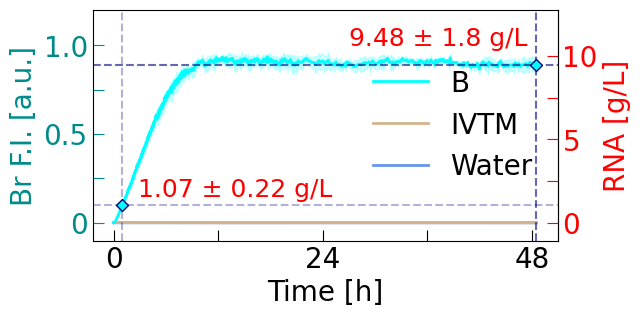

In [17]:
# Figure S34 (with controls) using mass concentration (g/L)
labels = {'Water': 'Water', 'IVTM' : 'IVTM', 'B' : 'B'}

plt.figure(figsize = (6, 3))
for sample in ['Water', 'IVTM', 'B']: 
    plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] - dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], 
                     dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_ratios[sample] + dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_ratios[sample], alpha = 0.2, color = colours[sample])

timepoint = (60)/60 # 1h

max_br = dfhbi_channel_droplets_mean_norm['B'][-1]*maxes_dfhbi_ratios['B']
max_br_std = dfhbi_channel_droplets_std_norm['B'][-1]*maxes_dfhbi_ratios['B']

plt.axhline(dfhbi_channel_droplets_mean_norm['B'][np.argmin(np.abs(time_droplets - timepoint))]*maxes_dfhbi_ratios['B'], ls = '--', color = 'navy', alpha = 0.3)
plt.axvline(time_droplets[np.argmin(np.abs(time_droplets - timepoint))], ls = '--', color = 'navy', alpha = 0.3)
plt.plot(time_droplets[np.argmin(np.abs(time_droplets - timepoint))], dfhbi_channel_droplets_mean_norm['B'][np.argmin(np.abs(time_droplets - timepoint))]*maxes_dfhbi_ratios['B'], marker = 'D', ms = 6, mec = 'navy', color = 'cyan')

plt.axhline(dfhbi_channel_droplets_mean_norm['B'][-1]*maxes_dfhbi_ratios['B'], ls = '--', color = 'navy', alpha = 0.6)
plt.axvline(time_droplets[-1], ls = '--', color = 'navy', alpha = 0.6)
plt.plot(time_droplets[-1], dfhbi_channel_droplets_mean_norm['B'][-1]*maxes_dfhbi_ratios['B'], marker = 'D', ms = 6, mec = 'navy', color = 'cyan')


ax = plt.gca()
ax.set_ylabel('Br F.I. [a.u.]', fontsize = 20, color = 'darkcyan')
ax.tick_params(direction = 'in', axis = 'y', length = 8, color = 'darkcyan')
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.00], labels = [0, '', 0.5, '', 1.00], fontsize = 20, color = 'darkcyan')
ax.set_ylim([-0.1, 1.2])

def fluo_to_mass(fluo): 
    return fluo * (9.481357780520097/max_br) # see Organelle Scaling/Organelle_Scaling.ipynb for derivation

def fluo_to_mass_std(fluo): 
    return fluo * (1.8037768506667389/max_br_std) # see Organelle Scaling/Organelle_Scaling.ipynb for derivation

def mass_to_fluo(mass): 
    return mass / (9.481357780520097/max_br)

secax = ax.secondary_yaxis('right', functions = (fluo_to_mass, mass_to_fluo), color = 'red')
secax.set_ylabel(r'RNA [g/L]', fontsize = 20)
secax.set_yticks([0, 2.5, 5.0, 7.5, 10], labels = [0, '', 5, '', 10], fontsize = 20)
secax.tick_params(direction = 'in', length = 8)

handles, labels2 = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels2[::-1], fontsize = 20, frameon = False)

ax.set_xticks([0, 12, 24, 36, 48], [0, '', 24, '', 48], fontsize = 20, color = 'black')
ax.set_xlabel('Time [h]', fontsize = 20)
ax.tick_params(direction = 'in', axis = 'x', length = 8)

plt.text(
    2.8, 0.15, 
    str(round(fluo_to_mass(dfhbi_channel_droplets_mean_norm['B'][np.argmin(np.abs(time_droplets - timepoint))]*maxes_dfhbi_ratios['B']), 2)) 
    + ' ± ' 
    + str(round(fluo_to_mass_std(dfhbi_channel_droplets_std_norm['B'][np.argmin(np.abs(time_droplets - timepoint))]*maxes_dfhbi_ratios['B']), 2)) 
    + " g/L", fontsize = 18, color = 'red'
)
plt.text(
    27, 1, 
    str(round(fluo_to_mass(dfhbi_channel_droplets_mean_norm['B'][-1]*maxes_dfhbi_ratios['B']), 2)) 
    + ' ± ' 
    + str(round(fluo_to_mass_std(dfhbi_channel_droplets_std_norm['B'][-1]*maxes_dfhbi_ratios['B']), 2)) 
    + " g/L", fontsize = 18, color = 'red'
)
plt.show()

In [18]:
# Binary systems: get ratios with respect to stoichiometric template setting (1:1)
maxes_mg_binary_ratios = process(
    mg_channel_droplets_mean, 
    sample_list=['Water', 'IVTM', 'A_bar+B_bar', 'A+B_bar', 'A_bar+B', 'A+B 1:1', 'A+B 1:2', 'A+B 1:4', 'A+B 2:1', 'A+B 4:1'], 
    reference=np.max(mg_channel_droplets_mean['A+B 1:1']),
)
maxes_dfhbi_binary_ratios = process(
    dfhbi_channel_droplets_mean, 
    sample_list=['Water', 'IVTM', 'A_bar+B_bar', 'A+B_bar', 'A_bar+B', 'A+B 1:1', 'A+B 1:2', 'A+B 1:4', 'A+B 2:1', 'A+B 4:1'], 
    reference=np.max(dfhbi_channel_droplets_mean['A+B 1:1']),
)

In [19]:
import matplotlib
extremes = ['firebrick', 'cyan']
extremes_rgba = np.array([np.array(matplotlib.colors.to_rgba(color, alpha=None)) for color in extremes])
in_between_colors = [(i/5)*extremes_rgba[0] + (5-i)/5*extremes_rgba[1] for i in range(1, 6)]
# Defining intermediate colours by mixing (weighted addition)
# Also decreased alpha of binary combinations to 60% to make all curves visible

extremes_v2 = ['orangered', 'cyan']
extremes_v2_rgba = np.array([np.array(matplotlib.colors.to_rgba(color, alpha=None)) for color in extremes_v2])
in_between_colors_v2 = [(i/5)*extremes_v2_rgba[0] + (5-i)/5*extremes_v2_rgba[1] for i in range(1, 6)]

in_between_colors[-2:] = in_between_colors_v2[-2:]

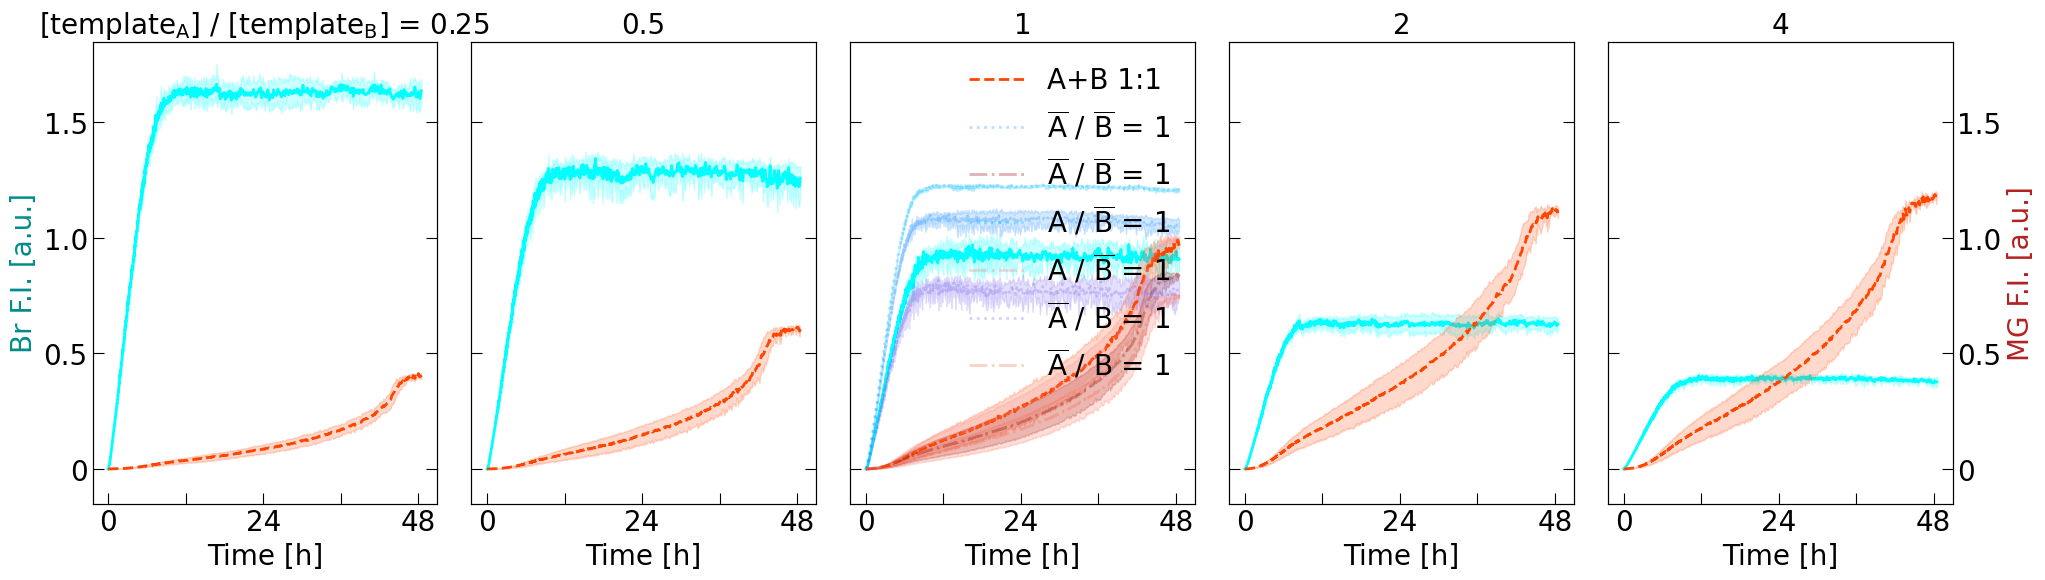

In [20]:
# Figure S40
colours = {
    'Water' : 'cornflowerblue', 
    'IVTM' : 'sienna', 
    'B_bar' : 'darkcyan', 
    'B' : 'cyan', 
    'B 1/2' : 'darkturquoise', 
    'B 1/4' : 'paleturquoise', 
    'A_bar' : 'firebrick', 
    'A' : 'orangered', 
    'A_bar+B_bar' : ['dodgerblue', 'darkred'], 
    'A+B_bar' : ['deepskyblue', 'lightcoral'], 
    'A_bar+B' : ['mediumslateblue', 'tomato'], 
    'A+B 1:1' : in_between_colors[2], 
    'A+B 1:2' : in_between_colors[1], 
    'A+B 1:4' : in_between_colors[0],
    'A+B 2:1' : in_between_colors[3], 
    'A+B 4:1' : in_between_colors[4], 
    'C' : 'gray', 
    'A+B+C' : 'lightgray'
}

labels = {'Water': 'Water', 'IVTM' : 'IVTM', 
          'A+B 1:4' : '0.25', 
          'A+B 1:2' : '0.5', 
          'A+B 1:1' : '1', 
          'A+B 2:1' : '2',  
          'A+B 4:1' : '4', 
          'A_bar+B_bar' : r'$\overline{A}$ / $\overline{B}$ = 1', 
          'A+B_bar' : r'A / $\overline{B}$ = 1', 
          'A_bar+B' : r'$\overline{A}$ / B = 1'}

plt.subplots(1, 5, figsize = (24, 6), sharey = True, sharex = True)
plt.subplots_adjust(hspace= .1, wspace = .1)

sample_list = ['A+B 1:4', 'A+B 1:2', 'A+B 1:1', 'A+B 2:1', 'A+B 4:1']

for sample, index in zip(sample_list, range(len(sample_list))): 
    plt.subplot(1, 5, index+1)
    plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_binary_ratios[sample], lw = 2.0, color = 'cyan', label = labels[sample])
    plt.fill_between(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_binary_ratios[sample] - dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_binary_ratios[sample], 
                     dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_binary_ratios[sample] + dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_binary_ratios[sample], alpha = 0.2, color = 'cyan')
    
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_binary_ratios[sample], lw = 2.0, ls = 'dashed', label = sample, color = 'orangered')
    ax2.fill_between(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_binary_ratios[sample] - mg_channel_droplets_std_norm[sample]*maxes_mg_binary_ratios[sample], 
                     mg_channel_droplets_mean_norm[sample]*maxes_mg_binary_ratios[sample] + mg_channel_droplets_std_norm[sample]*maxes_mg_binary_ratios[sample], alpha = 0.2, color = 'orangered')

    ax.set_xlabel('Time [h]', fontsize = 20)
    ax.set_xticks([0, 12, 24, 36, 48])
    ax.set_xticklabels([0, '', 24, '', 48], fontsize = 20)
    ax.set_yticks([0, 0.5, 1.00, 1.5])
    ax.set_yticklabels([0, 0.5, 1.00, 1.5], fontsize = 20)
    ax2.set_yticks([0, 0.5, 1.00, 1.5])
    ax2.set_yticklabels([], fontsize = 20)
    ax.set_ylim([-0.15, 1.85])
    ax2.set_ylim([-0.15, 1.85])
    if index == 0: 
        ax.set_ylabel('Br F.I. [a.u.]', fontsize = 20, color = 'darkcyan')
        ax.set_yticks([0, 0.5, 1.00, 1.5])
        ax.set_yticklabels([], fontsize = 20)
        ax.set_title(r"[template$_A$] / [template$_B$] = " +labels[sample], fontsize = 20)
    elif index == 2: 
        for sample2 in ['A_bar+B_bar', 'A+B_bar', 'A_bar+B']: 
            plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample2]*maxes_dfhbi_binary_ratios[sample2], lw = 2.0, ls = 'dotted', color = colours[sample2][0], label = labels[sample2], alpha = 0.3)
            plt.fill_between(time_droplets, dfhbi_channel_droplets_mean_norm[sample2]*maxes_dfhbi_binary_ratios[sample2] - dfhbi_channel_droplets_std_norm[sample2]*maxes_dfhbi_binary_ratios[sample2], 
                             dfhbi_channel_droplets_mean_norm[sample2]*maxes_dfhbi_binary_ratios[sample2] + dfhbi_channel_droplets_std_norm[sample2]*maxes_dfhbi_binary_ratios[sample2], alpha = 0.2, color = colours[sample2][0])

            plt.plot(time_droplets, mg_channel_droplets_mean_norm[sample2]*maxes_mg_binary_ratios[sample2], lw = 2.0, ls = 'dashdot', color = colours[sample2][1], label = labels[sample2], alpha = 0.3)
            plt.fill_between(time_droplets, mg_channel_droplets_mean_norm[sample2]*maxes_mg_binary_ratios[sample2] - mg_channel_droplets_std_norm[sample2]*maxes_mg_binary_ratios[sample2], 
                             mg_channel_droplets_mean_norm[sample2]*maxes_mg_binary_ratios[sample2] + mg_channel_droplets_std_norm[sample2]*maxes_mg_binary_ratios[sample2], alpha = 0.2, color = colours[sample2][1])
            plt.legend(frameon = False, fontsize = 20)
        ax.set_title(labels[sample], fontsize = 20)
    elif index == 4: 
        ax2.set_ylabel('MG F.I. [a.u.]', fontsize = 20, color = 'firebrick')
        ax2.set_yticklabels([0, 0.5, 1.00, 1.5], fontsize = 20)
        ax.set_title(labels[sample], fontsize = 20)
    else: 
        ax.set_title(labels[sample], fontsize = 20)
    
    ax.tick_params(direction = 'in', length = 8)
    ax2.tick_params(direction = 'in', length = 8)

In [21]:
# Normalise ternary together with other stoichiometric samples
maxes_mg_stoichiometric_ratios = process(
    mg_channel_droplets_mean, 
    sample_list=['Water', 'IVTM', 'A_bar+B_bar', 'A_bar+B', 'A+B_bar', 'A+B 1:1', 'A+B+C']
)
maxes_dfhbi_stoichiometric_ratios = process(
    dfhbi_channel_droplets_mean, 
    sample_list=['Water', 'IVTM', 'A_bar+B_bar', 'A_bar+B', 'A+B_bar', 'A+B 1:1', 'A+B+C']
)

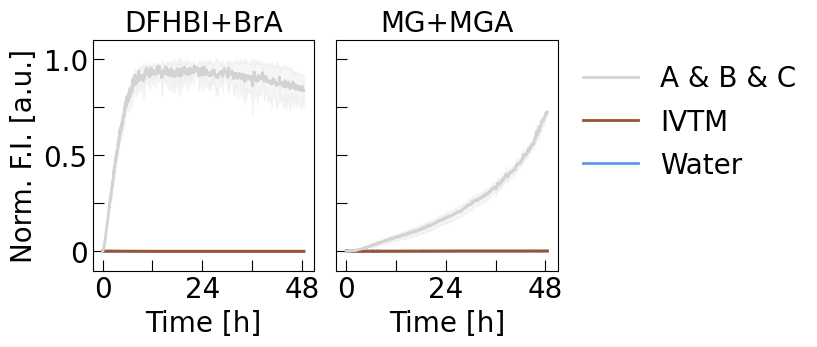

In [22]:
# Figure S43
plt.subplots(1, 2, figsize = (6, 3))
plt.subplots_adjust(wspace = 0.10)
plt.subplot(121)
for sample in ['Water', 'IVTM', 'A+B+C']: 
    plt.plot(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_stoichiometric_ratios[sample], lw = 2.0, color = colours[sample])
    plt.fill_between(time_droplets, dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_stoichiometric_ratios[sample] - dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_stoichiometric_ratios[sample], 
                     dfhbi_channel_droplets_mean_norm[sample]*maxes_dfhbi_stoichiometric_ratios[sample] + dfhbi_channel_droplets_std_norm[sample]*maxes_dfhbi_stoichiometric_ratios[sample], alpha = 0.2, color = colours[sample])
plt.xlabel('Time [h]', fontsize = 20)
plt.xticks([0, 12, 24, 36, 48], [0, '', 24, '', 48], fontsize = 20)
plt.yticks([0, 0.25, 0.5, 0.75, 1.00], [0, '', 0.5, '', 1.00], fontsize = 20)
plt.ylim([-0.1, 1.1])
ax = plt.gca()
ax.tick_params(direction = 'in', length = 8)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.locator_params(axis='y', nbins=5)
#plt.setp(ax.get_yticklabels(), fontsize= 20)
plt.ylabel('Norm. F.I. [a.u.]', fontsize = 20)
plt.title('DFHBI+BrA', fontsize = 20)
plt.subplot(122)
for sample in ['Water', 'IVTM', 'A+B+C']: 
    plt.plot(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_stoichiometric_ratios[sample], lw = 2.0, label = sample, color = colours[sample])
    plt.fill_between(time_droplets, mg_channel_droplets_mean_norm[sample]*maxes_mg_stoichiometric_ratios[sample] - mg_channel_droplets_std_norm[sample]*maxes_mg_stoichiometric_ratios[sample], 
                     mg_channel_droplets_mean_norm[sample]*maxes_mg_stoichiometric_ratios[sample] + mg_channel_droplets_std_norm[sample]*maxes_mg_stoichiometric_ratios[sample], alpha = 0.2, color = colours[sample])
plt.title('MG+MGA', fontsize = 20)
plt.xlabel('Time [h]', fontsize = 20)
plt.xticks([0, 12, 24, 36, 48], [0, '', 24, '', 48], fontsize = 20)
plt.yticks([0, 0.25, 0.5, 0.75, 1.00], [], fontsize = 20)
plt.ylim([-0.1, 1.1])
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax = plt.gca()
ax.tick_params(direction = 'in', length = 8)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.locator_params(axis='y', nbins=5)
#plt.setp(ax.get_yticklabels(), fontsize= 20)
handles, labels = ax.get_legend_handles_labels()
labels[1] = 'IVTM'
labels[2] = 'A & B & C'
ax.legend(handles[::-1], labels[::-1], frameon = False, bbox_to_anchor = [1.00, 1.00], fontsize = 20, labelspacing = 0.55)
plt.show()